## Uczenie maszynowe – zastosowania
### Zajęcia laboratoryjne
# 3. Regresja liniowa – zadanie

## Zadanie 3

# Część podstawowa (4 punkty)

Plik `fires_thefts.csv` zawiera rzeczywiste dane zebrane przez *U.S. Commission on Civil Rights*, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). 

Stwórz model (regresja liniowa) przewidujący liczbę włamań na podstawie liczby pożarów:
 * Oblicz parametry $\theta$ krzywej regresyjnej za pomocą metody gradientu prostego (*gradient descent*). Możesz wybrać wersję iteracyjną lub macierzową algorytmu.
 * Wykorzystując uzyskaną krzywą regresyjną przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

### 1. Walidacja i wizualizacja danych

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("fires_thefts.csv", header=None, names=["Fires", "Thefts"])

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fires   42 non-null     float64
 1   Thefts  42 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 804.0 bytes
None


In [8]:
print(df.describe())

           Fires      Thefts
count  42.000000   42.000000
mean   12.692857   33.666667
std     9.667683   23.040438
min     2.000000    4.000000
25%     5.625000   22.000000
50%    10.500000   31.000000
75%    17.175000   39.750000
max    39.700000  147.000000


In [9]:
print(df.head(10))

   Fires  Thefts
0    6.2      29
1    9.5      44
2   10.5      36
3    7.7      37
4    8.6      53
5   34.1      68
6   11.0      75
7    6.9      18
8    7.3      31
9   15.1      25


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

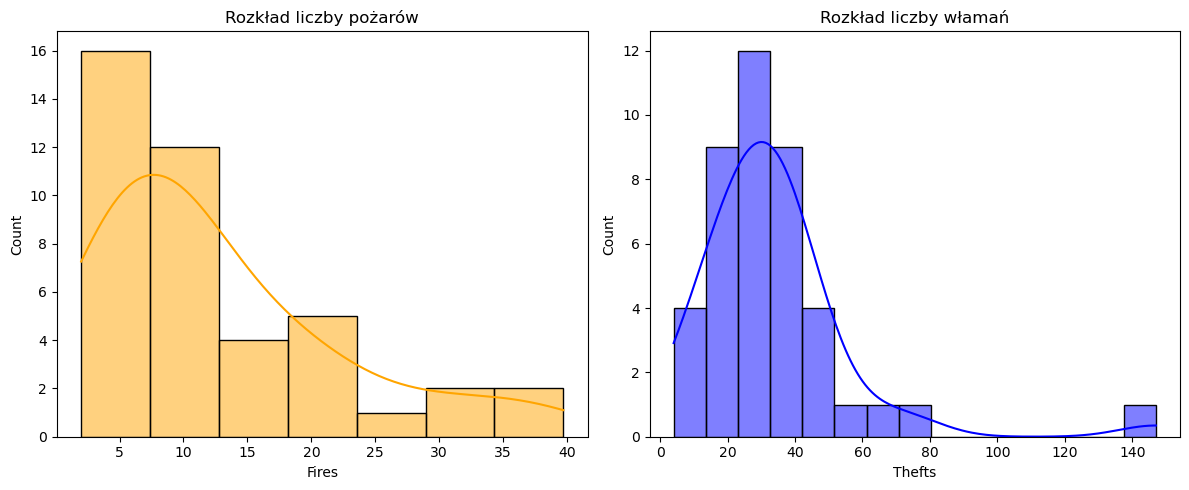

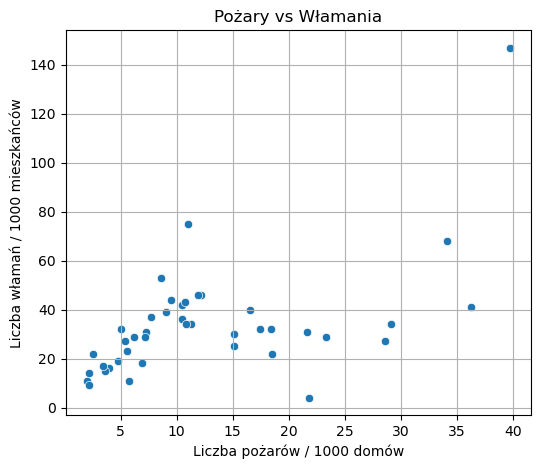

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Fires"], kde=True, color="orange")
plt.title("Rozkład liczby pożarów")

plt.subplot(1, 2, 2)
sns.histplot(df["Thefts"], kde=True, color="blue")
plt.title("Rozkład liczby włamań")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="Fires", y="Thefts")
plt.title("Pożary vs Włamania")
plt.xlabel("Liczba pożarów / 1000 domów")
plt.ylabel("Liczba włamań / 1000 mieszkańców")
plt.grid(True)
plt.show()

### 2. Model regresji

In [13]:
import numpy as np

X = df["Fires"].values
y = df["Thefts"].values

m = 0  
b = 0  
alpha = 0.0001 
epochs = 10000

n = len(X)

for _ in range(epochs):
    y_pred = m * X + b
    error = y_pred - y
    grad_m = (2/n) * np.dot(error, X)
    grad_b = (2/n) * np.sum(error)
    m -= alpha * grad_m
    b -= alpha * grad_b

print(f"Parametry regresji: m = {m:.4f}, b = {b:.4f}")

Parametry regresji: m = 1.7269, b = 8.7866


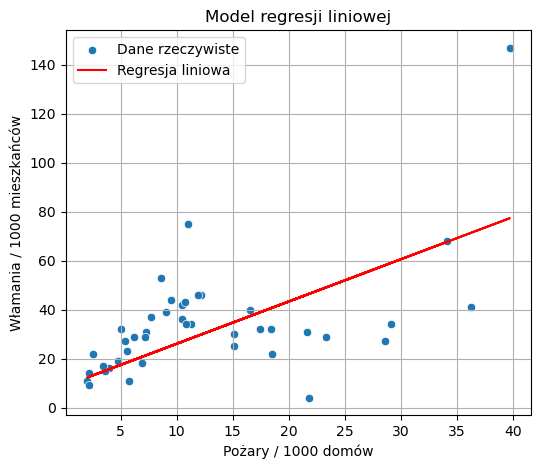

In [14]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X, y=y, label="Dane rzeczywiste")
plt.plot(X, m*X + b, color="red", label="Regresja liniowa")
plt.xlabel("Pożary / 1000 domów")
plt.ylabel("Włamania / 1000 mieszkańców")
plt.title("Model regresji liniowej")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
for x in [50, 100, 200]:
    pred = m * x + b
    print(f"Dla {x} pożarów → przewidywana liczba włamań: {pred:.2f} / 1000 mieszkańców")


Dla 50 pożarów → przewidywana liczba włamań: 95.13 / 1000 mieszkańców
Dla 100 pożarów → przewidywana liczba włamań: 181.48 / 1000 mieszkańców
Dla 200 pożarów → przewidywana liczba włamań: 354.17 / 1000 mieszkańców


# Część zaawansowana (2 punkty)

Dla różnych wartości długości kroku $\alpha \in \{ 0.001, 0.01 , 0.1 \}$ stwórz wykres, który zilustruje progresję wartości $J(\theta)$ dla pierwszych 200 króków algorytmu gradientu prostego:
 * Oś $x$ wykresu to kolejne kroki algorytmu – od 0 do 200.
 * Oś $y$ wykresu to wartosci $J(\theta)$.
 * Wykres powinien skłądać się z trzech krzywych:
   1. dla $\alpha = 0.001$
   2. dla $\alpha = 0.01$
   3. dla $\alpha = 0.1$

In [17]:
# Normalizacja cech
X = (df["Fires"] - df["Fires"].mean()) / df["Fires"].std()
y = df["Thefts"].values 

n = len(X)

def compute_cost(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def gradient_descent(X, y, alpha, steps):
    m = 0
    b = 0
    J_history = []

    for _ in range(steps):
        y_pred = m * X + b
        error = y_pred - y
        grad_m = (2/n) * np.dot(error, X)
        grad_b = (2/n) * np.sum(error)
        m -= alpha * grad_m
        b -= alpha * grad_b
        J = compute_cost(y, y_pred)
        J_history.append(J)

    return J_history

alphas = [0.001, 0.01, 0.1]
steps = 200


costs = {f"alpha = {a}": gradient_descent(X, y, a, steps) for a in alphas}

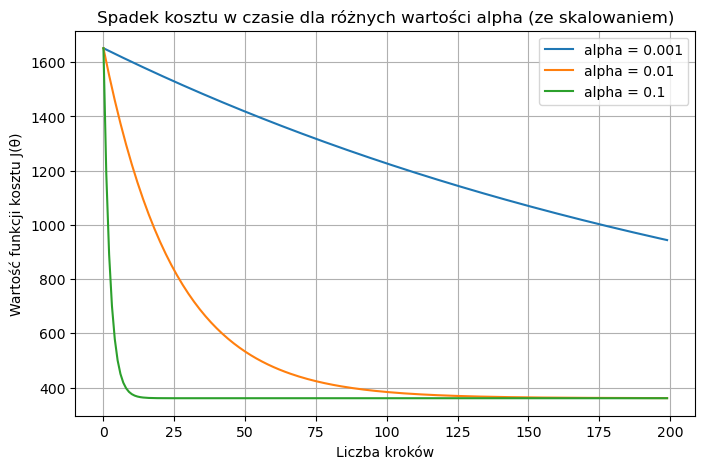

In [18]:
plt.figure(figsize=(8, 5))
for label, J_vals in costs.items():
    plt.plot(range(steps), J_vals, label=label)

plt.xlabel("Liczba kroków")
plt.ylabel("Wartość funkcji kosztu J(θ)")
plt.title("Spadek kosztu w czasie dla różnych wartości alpha (ze skalowaniem)")
plt.legend()
plt.grid(True)
plt.show()